In [1]:
import numpy as np
from Grouping import *
import matplotlib.pyplot as plt

N = 1000
VN = 20
CN = 10
CS = 5
a = 1

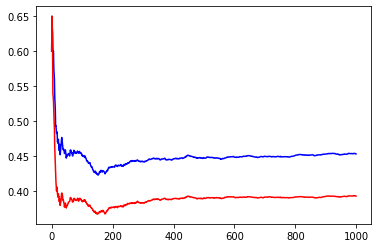

0.45289999999999997
0.39249999999999996
0.1538853503184714 %


In [2]:
def zipf(VN, CN, a=1):
    P = np.array([1/(i+1)**a for i in range(VN)])
    P /= sum(P)
    rq = make_list(CN)
    for n in range(CN):
        rq[n] = list(np.random.choice(list(range(VN)), 1, False, P))
    return list(rq)

def make_list(n):
    l = [[]]
    for _ in range(n-1):
        l += [[]]
    return l

connection = 0
Xconnection = 0
cache = make_list(CN)

con_list = []
con_Xlist = []

request = zipf(VN, CN, a)
for i in range(N):
    for n in range(CN):
        if request[n][0] in cache[n]:
            cache[n].remove(request[n][0])
            cache[n].append(request[n][0])
        else:
            if len(cache[n]) < CS:
                cache[n].append(request[n][0])
            else:
                cache[n] = cache[n][1:] + request[n]
                
    request = zipf(VN, CN, a)
    cn, rq, ch = Local(request, cache)
    cn, rq, ch = BCG(list(range(VN)), cn, rq, ch)
    connection += len(cn)
    cn, rq, ch = XBCG(list(range(VN)), cn, rq, ch)
    Xconnection += len(cn)
    
    con_list.append(connection/(i+1)/CN)
    con_Xlist.append(Xconnection/(i+1)/CN)

t = list(range(N))

plt.plot(t, con_list, 'b')
plt.plot(t, con_Xlist, 'r')
plt.show()
print(con_list[N-1])
print(con_Xlist[N-1])
print(con_list[N-1]/con_Xlist[N-1]-1, '%')

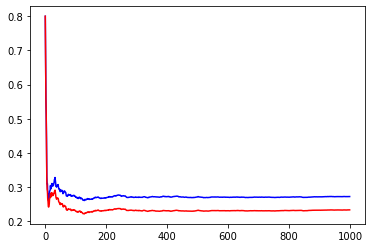

0.2719910639486177
0.23295168947221445
0.16758571086070506 %


In [3]:
def zipf(VN, CN, a=1):
    P = np.array([1/(i+1)**a for i in range(VN)])
    P /= sum(P)
    rq = make_list(CN)
    for n in range(CN):
        rq[n] = list(np.random.choice(list(range(VN)), 1, False, P))
    return list(rq)

def make_list(n):
    l = [[]]
    for _ in range(n-1):
        l += [[]]
    return l

count = 0
connection = 0
Xconnection = 0
cache = make_list(CN)

con_list = []
con_Xlist = []

request = zipf(VN, CN, a)
for i in range(N):
    for n in range(CN):
        if request[n][0] in cache[n]:
            cache[n].remove(request[n][0])
            cache[n].append(request[n][0])
        else:
            if len(cache[n]) < CS:
                cache[n].append(request[n][0])
            else:
                cache[n] = cache[n][1:] + request[n]
    
    request = zipf(VN, CN, a)
    cn, rq, ch = Local(request, cache)
    cn, rq, ch = BCG(list(range(VN)), cn, rq, ch)
    connection += len(cn)
    cn, rq, ch = XBCG(list(range(VN)), cn, rq, ch)
    Xconnection += len(cn)
    
    for n in range(CN):
        while request[n][0] in cache[n]:
            request[n] = zipf(VN, 1, a)[0]
            count += 1
    count += CN
    
    con_list.append(connection/count)
    con_Xlist.append(Xconnection/count)    

t = list(range(N))

plt.plot(t, con_list, 'b')
plt.plot(t, con_Xlist, 'r')
plt.show()
print(con_list[N-1])
print(con_Xlist[N-1])
print(con_list[N-1]/con_Xlist[N-1]-1, '%')